<a href="https://colab.research.google.com/github/darshannayak21/bml/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load California housing dataset
data = fetch_california_housing()
X = data.data  # Features only

# Step 1: Standardize the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
print("Standardized dataset (first 5 rows):\n", X_std[:5])

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)
print("\nCovariance matrix:\n", cov_matrix)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 4: Sort eigenvalues and select top components
sorted_indices = np.argsort(eigenvalues)[::-1]
top_eigenvalues = eigenvalues[sorted_indices]
top_eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues:\n", top_eigenvalues)
print("\nSorted Eigenvectors:\n", top_eigenvectors)

# Step 5: Project data onto the new principal components
X_pca_manual = X_std @ top_eigenvectors
print("\nProjected Data (Manual PCA) - First 5 rows:\n", X_pca_manual[:5])

# Compare with sklearn PCA
pca = PCA()
X_pca_sklearn = pca.fit_transform(X_std)
print("\nProjected Data (sklearn PCA) - First 5 rows:\n", X_pca_sklearn[:5])

# Compute the difference between manual and sklearn PCA results
difference = np.abs(X_pca_manual - X_pca_sklearn)
max_diff = np.max(difference)
print(f"\nMaximum difference between manual PCA and sklearn PCA: {max_diff}")


Standardized dataset (first 5 rows):
 [[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654
   1.05254828 -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223
   1.04318455 -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253
   1.03850269 -1.33282653]
 [ 0.93296751  1.85618152  0.15696608 -0.04983292 -0.76602806 -0.0503293
   1.03850269 -1.33781784]
 [-0.012881    1.85618152  0.3447108  -0.03290586 -0.75984669 -0.08561576
   1.03850269 -1.33781784]]

Covariance matrix:
 [[ 1.00004845 -0.11903976  0.32691127 -0.06204314  0.00483458  0.01876716
  -0.07981299 -0.0151766 ]
 [-0.11903976  1.00004845 -0.15328485 -0.07775105 -0.29625859  0.013192
   0.01117321 -0.10820206]
 [ 0.32691127 -0.15328485  1.00004845  0.84766239 -0.07221635 -0.00485253
   0.10639412 -0.02754139]
 [-0.06204314 -0.07775105  0.84766239  1.00004845 -0.06620061 -0.0061815
   0.06972451  0.01334504]
 [ 0.00483458 -0.29625859 -0.072216

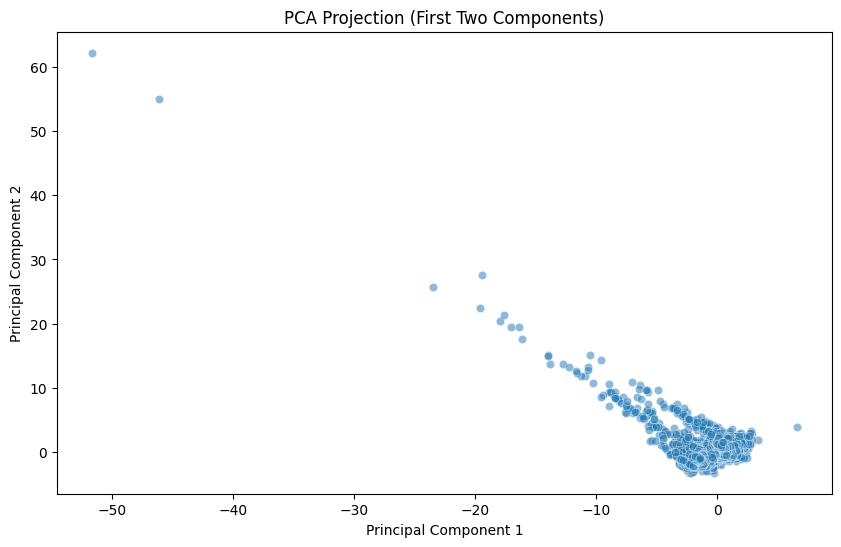

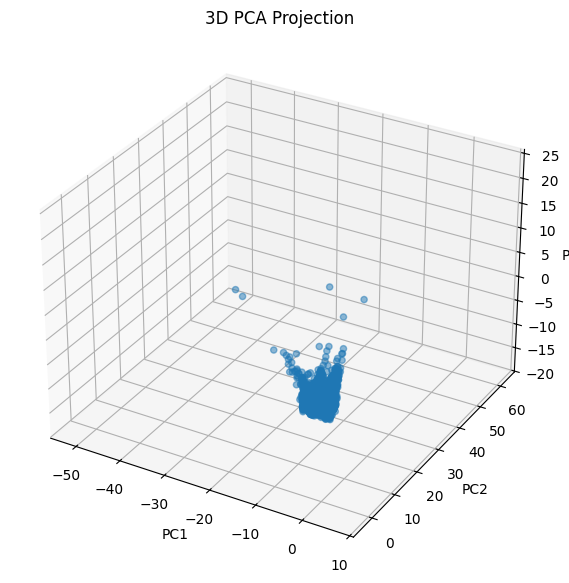

Top 8 Eigenvalues:
 [2.02704763 1.88139074 1.27115235 1.03108764 1.0031042  0.65941198
 0.08160574 0.04558733]

Top 8 Principal Components (Eigenvectors):
 [[-0.07746229  0.22987873  0.21822239  0.88529408 -0.00260258 -0.14981849
   0.16923764  0.24227053]
 [-0.00731846 -0.26078574 -0.6275508   0.10989777  0.22293588 -0.68393093
  -0.0810348   0.04484583]
 [-0.43914246  0.54668689 -0.06399944  0.04640173  0.02985194 -0.09505449
  -0.53066164 -0.45881371]
 [-0.3999956   0.50184958 -0.19184813 -0.33814378  0.05092211 -0.08685356
   0.53156581  0.37987469]
 [ 0.17178267  0.10062559  0.65037482 -0.28320692  0.00807783 -0.67522557
  -0.03167607  0.01316952]
 [ 0.01464423  0.00262099  0.15772711 -0.00491848  0.97266948  0.16941048
   0.00324648 -0.00895931]
 [-0.56836442 -0.37401073  0.19259966 -0.062214   -0.02276072  0.04206944
  -0.43179746  0.55441475]
 [ 0.53697448  0.4223868  -0.18082441 -0.05984646  0.01180653  0.08255109
  -0.461698    0.52616501]]

Transformed Data (First 5 rows):
 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

# Load California housing dataset
data = fetch_california_housing()
X = data.data  # Features only
feature_names = data.feature_names

# Step 1: Standardize the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and select the top 8 components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
top_eigenvalues = eigenvalues[sorted_indices][:8]  # Top 8 eigenvalues
top_eigenvectors = eigenvectors[:, sorted_indices][:, :8]  # Top 8 eigenvectors

# Step 5: Project data onto the top 8 principal components
X_pca_manual = X_std @ top_eigenvectors

# Visualization - Pairplot for the first 2 principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_manual[:, 0], y=X_pca_manual[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (First Two Components)")
plt.show()

# 3D Visualization for the first 3 components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_manual[:, 0], X_pca_manual[:, 1], X_pca_manual[:, 2], alpha=0.5)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection")
plt.show()

# Print results
print("Top 8 Eigenvalues:\n", top_eigenvalues)
print("\nTop 8 Principal Components (Eigenvectors):\n", top_eigenvectors)
print("\nTransformed Data (First 5 rows):\n", X_pca_manual[:5])


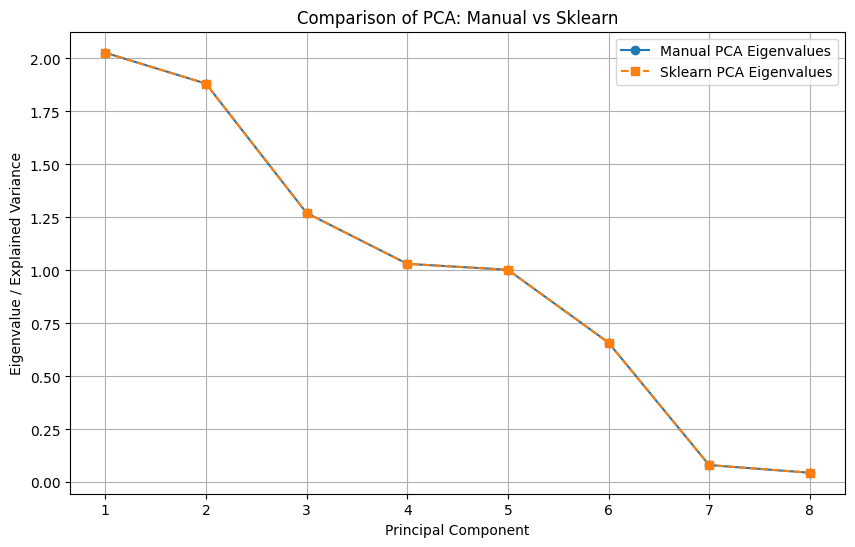

Top 8 Eigenvalues (Manual PCA):
 [2.02704763 1.88139074 1.27115235 1.03108764 1.0031042  0.65941198
 0.08160574 0.04558733]

Top 8 Explained Variance (Sklearn PCA):
 [2.02704763 1.88139074 1.27115235 1.03108764 1.0031042  0.65941198
 0.08160574 0.04558733]

Difference between Manual and Sklearn PCA:
 [2.66453526e-15 1.33226763e-15 4.44089210e-16 4.44089210e-16
 2.22044605e-16 6.66133815e-16 4.16333634e-17 3.74700271e-16]
COVARIANCE MATRIX
[[ 1.00004845 -0.11903976  0.32691127 -0.06204314  0.00483458  0.01876716
  -0.07981299 -0.0151766 ]
 [-0.11903976  1.00004845 -0.15328485 -0.07775105 -0.29625859  0.013192
   0.01117321 -0.10820206]
 [ 0.32691127 -0.15328485  1.00004845  0.84766239 -0.07221635 -0.00485253
   0.10639412 -0.02754139]
 [-0.06204314 -0.07775105  0.84766239  1.00004845 -0.06620061 -0.0061815
   0.06972451  0.01334504]
 [ 0.00483458 -0.29625859 -0.07221635 -0.06620061  1.00004845  0.06986612
  -0.10879002  0.09977806]
 [ 0.01876716  0.013192   -0.00485253 -0.0061815   0.06

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load California housing dataset
data = fetch_california_housing()
X = data.data  # Features only

# Step 1: Standardize the dataset
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)

# Step 3: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and select the top 8 components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
top_eigenvalues = eigenvalues[sorted_indices][:8]  # Top 8 eigenvalues
top_eigenvectors = eigenvectors[:, sorted_indices][:, :8]  # Top 8 eigenvectors

# Step 5: Project data onto the top 8 principal components
X_pca_manual = X_std @ top_eigenvectors

# Step 6: Use sklearn's PCA for comparison
pca = PCA(n_components=8)
X_pca_sklearn = pca.fit_transform(X_std)

# Plot both methods for comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), top_eigenvalues, marker='o', linestyle='-', label="Manual PCA Eigenvalues")
plt.plot(range(1, 9), pca.explained_variance_, marker='s', linestyle='--', label="Sklearn PCA Eigenvalues")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue / Explained Variance")
plt.title("Comparison of PCA: Manual vs Sklearn")
plt.legend()
plt.grid()
plt.show()

# Print results
print("Top 8 Eigenvalues (Manual PCA):\n", top_eigenvalues)
print("\nTop 8 Explained Variance (Sklearn PCA):\n", pca.explained_variance_)
print("\nDifference between Manual and Sklearn PCA:\n", np.abs(top_eigenvalues - pca.explained_variance_))
print("COVARIANCE MATRIX")
print(cov_matrix)


In [ ]:
import numpy as np

def fit_pca(X, n_components):
    # Step 1: Standardize values
    mean = np.mean(X, axis=0)
    X = X - mean

    # Step 2: Calculate covariance matrix
    cov_matrix = np.cov(X, rowvar=False)

    # Step 3: Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Step 4: Sort eigenvalues and select top eigenvalues/vectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    components = eigenvectors[:, :n_components]

    return components, mean

def transform_pca(X, components, mean):
    # Step 5: Use the transposed matrix
    X = X - mean
    return np.dot(X, components)

# Sample usage
# Changed _name_ to __name__
if __name__ == "__main__":
    # Sample data
    X = np.array([[2.5, 2.4],
                  [0.5, 0.7],
                  [2.2, 2.9],
                  [1.9, 2.2],
                  [3.1, 3.0],
                  [2.3, 2.7],
                  [2.0, 1.6],
                  [1.0, 1.1],
                  [1.5, 1.6],
                  [1.1, 0.9]])

    # Number of principal components
    n_components = 1

    # Fit PCA
    components, mean = fit_pca(X, n_components)

    # Transform data
    X_transformed = transform_pca(X, components, mean)

    print("Original Data:\n", X)
    print("Transformed Data:\n", X_transformed)

Original Data:
 [[2.5 2.4]
 [0.5 0.7]
 [2.2 2.9]
 [1.9 2.2]
 [3.1 3. ]
 [2.3 2.7]
 [2.  1.6]
 [1.  1.1]
 [1.5 1.6]
 [1.1 0.9]]
Transformed Data:
 [[ 0.82797019]
 [-1.77758033]
 [ 0.99219749]
 [ 0.27421042]
 [ 1.67580142]
 [ 0.9129491 ]
 [-0.09910944]
 [-1.14457216]
 [-0.43804614]
 [-1.22382056]]
